In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
# Ensure necessary resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Restaurant_Reviews 1 (2).tsv', sep='\t')

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Preprocess the Review column
data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

# Convert text to features using Bag of Words
vectorizer = CountVectorizer(max_features=1500)
X = vectorizer.fit_transform(data['Cleaned_Review']).toarray()
y = data['Liked']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        96
           1       0.77      0.75      0.76       104

    accuracy                           0.76       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



<ipython-input-7-6607a746ca78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Liked', data=data, palette='viridis')


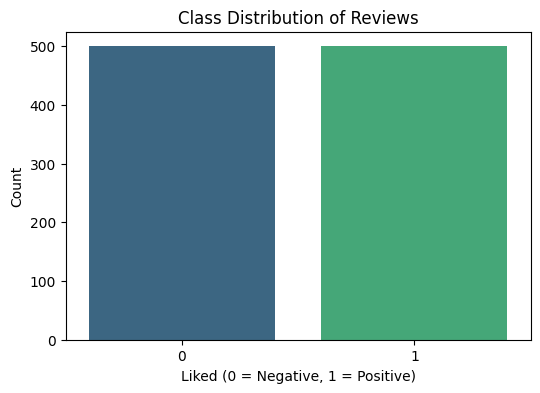

In [ ]:
# 1. Class Distribution of Reviews
plt.figure(figsize=(6, 4))
sns.countplot(x='Liked', data=data, palette='viridis')
plt.title('Class Distribution of Reviews')
plt.xlabel('Liked (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

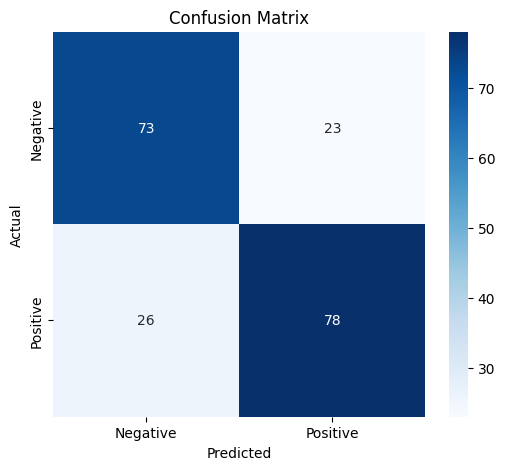

In [ ]:
# 3. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()